# TSLA Intraday ATR Analysis

This notebook calculates the 20-day moving Average True Range (ATR) for TSLA using intraday minute-level data.

## Methodology
- **Intraday ATR**: For each trading day, we calculate the absolute difference between the opening price (first minute) and closing price (last minute)
- **20-Day Moving Average**: We then apply a 20-day rolling window to smooth the daily ATR values
- **Data Source**: TSLA minute-level data for August 2025

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', 50)

print("Libraries imported successfully!")

Libraries imported successfully!


## 1. Load and Prepare Data

In [2]:
# Load the TSLA minute data
df = pd.read_csv('tsla_minute_data_august_2025.csv')

# Convert time column to datetime
df['time'] = pd.to_datetime(df['time'])

# Extract date for grouping
df['date'] = df['time'].dt.date

print(f"Data loaded successfully!")
print(f"Total records: {len(df):,}")
print(f"Date range: {df['time'].min()} to {df['time'].max()}")
print(f"\nFirst few rows:")
df.head()

Data loaded successfully!
Total records: 8,190
Date range: 2025-08-01 06:30:00 to 2025-08-29 12:59:00

First few rows:


,ticker,time,open,close,high,low,vwap,date
0,TSLA,2025-08-01 06:30:00,306.28,306.7450,307.6899,306.0000,306.652510,2025-08-01
1,TSLA,2025-08-01 06:31:00,306.70,308.1080,308.7599,306.5700,307.955538,2025-08-01
2,TSLA,2025-08-01 06:32:00,308.11,306.6399,308.1796,306.1000,306.969419,2025-08-01
3,TSLA,2025-08-01 06:33:00,306.52,304.8200,306.6500,304.2800,305.376936,2025-08-01
4,TSLA,2025-08-01 06:34:00,304.82,304.3600,304.8899,303.5114,304.023159,2025-08-01


## 2. Calculate Daily Open and Close Prices

In [3]:
# Group by date and get the first and last prices of each day
daily_prices = df.groupby('date').agg({
    'open': 'first',   # First minute's open price of the day
    'close': 'last',   # Last minute's close price of the day
    'high': 'max',     # Highest price of the day
    'low': 'min',      # Lowest price of the day
    'time': ['first', 'last']  # First and last timestamps
}).reset_index()

# Flatten column names
daily_prices.columns = ['date', 'daily_open', 'daily_close', 'daily_high', 'daily_low', 'first_time', 'last_time']

print(f"Daily prices calculated for {len(daily_prices)} trading days")
print("\nDaily price summary:")
daily_prices[['date', 'daily_open', 'daily_close']].head(10)

Daily prices calculated for 21 trading days

Daily price summary:


,date,daily_open,daily_close
0,2025-08-01,306.28,302.6100
1,2025-08-04,309.08,309.2999
2,2025-08-05,308.98,308.6800
3,2025-08-06,307.87,319.9600
4,2025-08-07,319.79,322.2900
5,2025-08-08,321.45,329.6764
6,2025-08-11,335.03,339.1270
7,2025-08-12,345.19,340.7100
8,2025-08-13,341.50,339.3400
9,2025-08-14,335.59,335.5701


## 3. Calculate Daily ATR (Intraday Range)

In [4]:
# Calculate the intraday ATR (absolute difference between open and close)
daily_prices['intraday_atr'] = abs(daily_prices['daily_open'] - daily_prices['daily_close'])

# Also calculate the traditional high-low range for comparison
daily_prices['high_low_range'] = daily_prices['daily_high'] - daily_prices['daily_low']

# Calculate percentage move
daily_prices['pct_change'] = ((daily_prices['daily_close'] - daily_prices['daily_open']) / daily_prices['daily_open']) * 100

print("Daily ATR Statistics:")
print(f"Mean Intraday ATR: ${daily_prices['intraday_atr'].mean():.2f}")
print(f"Max Intraday ATR: ${daily_prices['intraday_atr'].max():.2f}")
print(f"Min Intraday ATR: ${daily_prices['intraday_atr'].min():.2f}")
print(f"Std Dev: ${daily_prices['intraday_atr'].std():.2f}")

print("\nDaily ATR values:")
daily_prices[['date', 'daily_open', 'daily_close', 'intraday_atr', 'pct_change']].round(2)

Daily ATR Statistics:
Mean Intraday ATR: $5.60
Max Intraday ATR: $18.35
Min Intraday ATR: $0.02
Std Dev: $4.57

Daily ATR values:


,date,daily_open,daily_close,intraday_atr,pct_change
0,2025-08-01,306.28,302.61,3.67,-1.20
1,2025-08-04,309.08,309.30,0.22,0.07
2,2025-08-05,308.98,308.68,0.30,-0.10
3,2025-08-06,307.87,319.96,12.09,3.93
4,2025-08-07,319.79,322.29,2.50,0.78
5,2025-08-08,321.45,329.68,8.23,2.56
6,2025-08-11,335.03,339.13,4.10,1.22
7,2025-08-12,345.19,340.71,4.48,-1.30
8,2025-08-13,341.50,339.34,2.16,-0.63
9,2025-08-14,335.59,335.57,0.02,-0.01


## 4. Calculate 20-Day Moving Average of ATR

In [5]:
# Calculate the 20-day moving average of the intraday ATR
daily_prices['atr_ma20'] = daily_prices['intraday_atr'].rolling(window=20, min_periods=1).mean()

# Also calculate other moving averages for context
daily_prices['atr_ma5'] = daily_prices['intraday_atr'].rolling(window=5, min_periods=1).mean()
daily_prices['atr_ma10'] = daily_prices['intraday_atr'].rolling(window=10, min_periods=1).mean()

print("20-Day Moving Average ATR calculated!")
print(f"\nFinal 20-Day MA ATR: ${daily_prices['atr_ma20'].iloc[-1]:.2f}")
print(f"Average 20-Day MA ATR: ${daily_prices['atr_ma20'].mean():.2f}")

# Display the last few rows with all calculations
print("\nLast 10 days with moving averages:")
daily_prices[['date', 'intraday_atr', 'atr_ma5', 'atr_ma10', 'atr_ma20']].tail(10).round(2)

20-Day Moving Average ATR calculated!

Final 20-Day MA ATR: $5.69
Average 20-Day MA ATR: $4.26

Last 10 days with moving averages:


,date,intraday_atr,atr_ma5,atr_ma10,atr_ma20
11,2025-08-18,5.53,3.85,4.65,4.20
12,2025-08-19,6.42,4.24,5.26,4.37
13,2025-08-20,5.29,4.86,4.58,4.43
14,2025-08-21,2.03,5.27,4.53,4.27
15,2025-08-22,18.35,7.52,5.54,5.15
16,2025-08-25,7.68,7.95,5.90,5.30
17,2025-08-26,6.74,8.02,6.13,5.38
18,2025-08-27,2.46,7.45,6.16,5.23
19,2025-08-28,5.01,8.05,6.66,5.22
20,2025-08-29,13.23,7.02,7.27,5.69


## 5. Visualization with Matplotlib

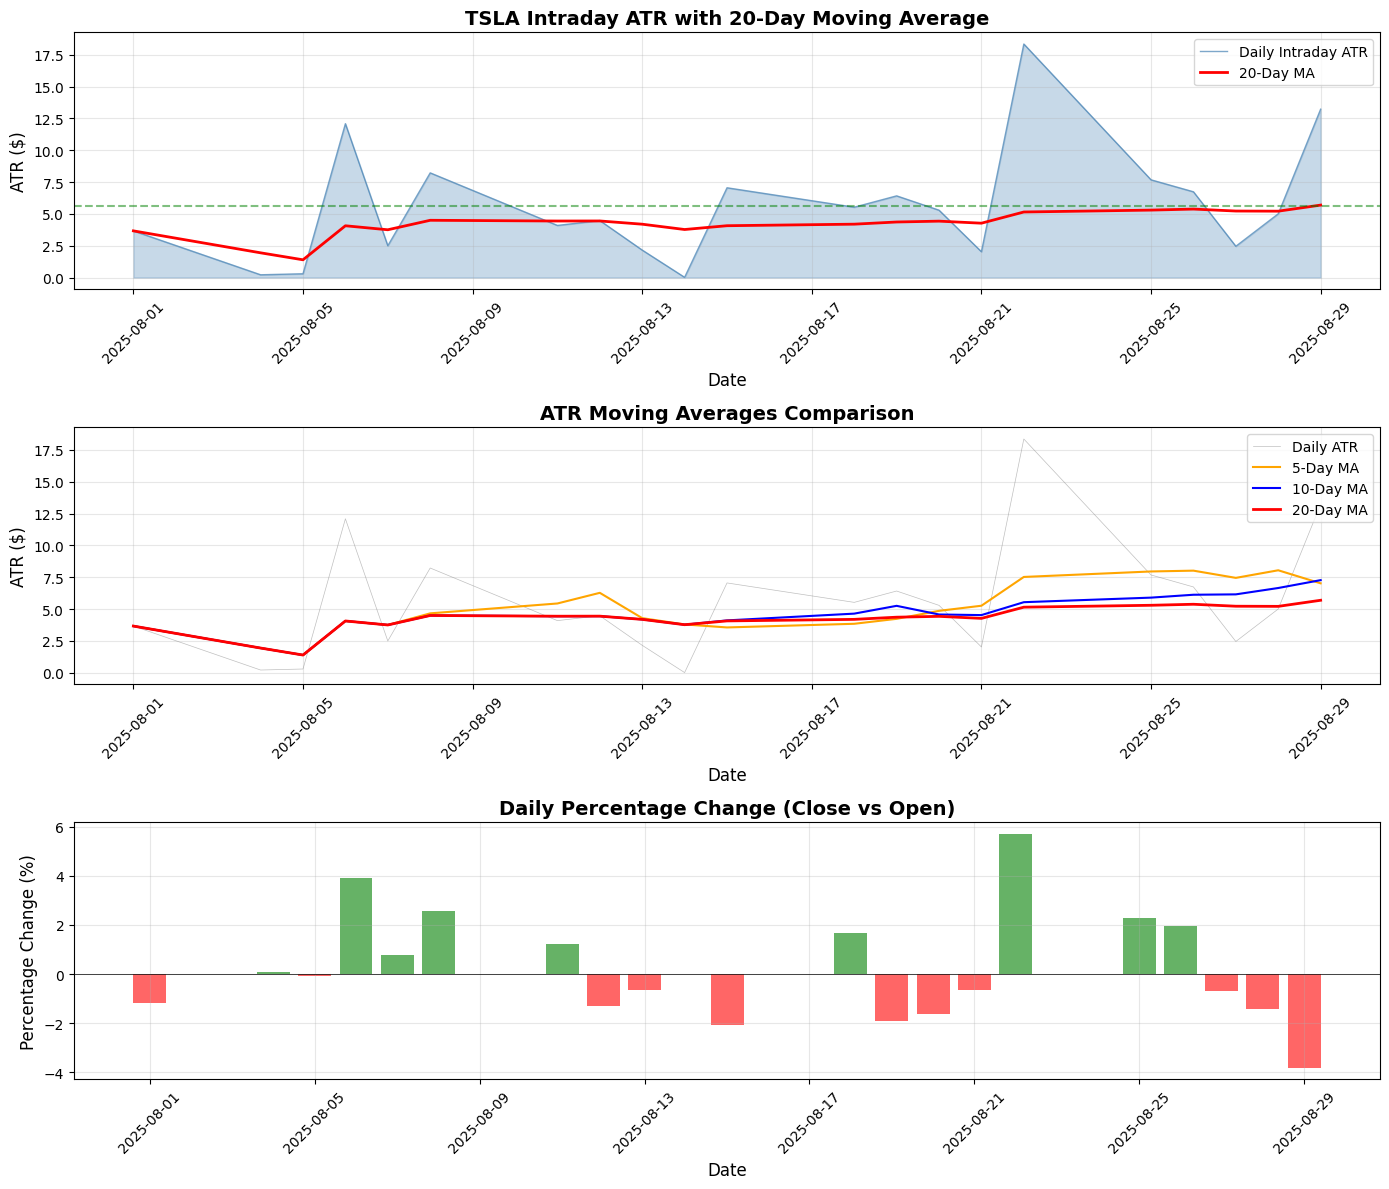

Visualization complete!


In [6]:
# Create the main plot
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 12))

# Plot 1: Daily ATR with 20-day moving average
ax1.plot(daily_prices['date'], daily_prices['intraday_atr'], 
         label='Daily Intraday ATR', color='steelblue', linewidth=1, alpha=0.7)
ax1.plot(daily_prices['date'], daily_prices['atr_ma20'], 
         label='20-Day MA', color='red', linewidth=2)
ax1.fill_between(daily_prices['date'], 0, daily_prices['intraday_atr'], 
                  alpha=0.3, color='steelblue')

ax1.set_title('TSLA Intraday ATR with 20-Day Moving Average', fontsize=14, fontweight='bold')
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('ATR ($)', fontsize=12)
ax1.legend(loc='upper right')
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# Add horizontal line for mean ATR
mean_atr = daily_prices['intraday_atr'].mean()
ax1.axhline(y=mean_atr, color='green', linestyle='--', alpha=0.5, 
            label=f'Mean ATR: ${mean_atr:.2f}')

# Plot 2: Multiple moving averages comparison
ax2.plot(daily_prices['date'], daily_prices['intraday_atr'], 
         label='Daily ATR', color='gray', linewidth=0.5, alpha=0.5)
ax2.plot(daily_prices['date'], daily_prices['atr_ma5'], 
         label='5-Day MA', color='orange', linewidth=1.5)
ax2.plot(daily_prices['date'], daily_prices['atr_ma10'], 
         label='10-Day MA', color='blue', linewidth=1.5)
ax2.plot(daily_prices['date'], daily_prices['atr_ma20'], 
         label='20-Day MA', color='red', linewidth=2)

ax2.set_title('ATR Moving Averages Comparison', fontsize=14, fontweight='bold')
ax2.set_xlabel('Date', fontsize=12)
ax2.set_ylabel('ATR ($)', fontsize=12)
ax2.legend(loc='upper right')
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='x', rotation=45)

# Plot 3: Daily percentage change
colors = ['green' if x > 0 else 'red' for x in daily_prices['pct_change']]
ax3.bar(daily_prices['date'], daily_prices['pct_change'], color=colors, alpha=0.6)
ax3.axhline(y=0, color='black', linestyle='-', linewidth=0.5)

ax3.set_title('Daily Percentage Change (Close vs Open)', fontsize=14, fontweight='bold')
ax3.set_xlabel('Date', fontsize=12)
ax3.set_ylabel('Percentage Change (%)', fontsize=12)
ax3.grid(True, alpha=0.3)
ax3.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("Visualization complete!")

## 6. Statistical Analysis

In [7]:
# Create a summary statistics table
summary_stats = pd.DataFrame({
    'Metric': ['Mean', 'Median', 'Std Dev', 'Min', 'Max', '25th Percentile', '75th Percentile'],
    'Daily ATR': [
        daily_prices['intraday_atr'].mean(),
        daily_prices['intraday_atr'].median(),
        daily_prices['intraday_atr'].std(),
        daily_prices['intraday_atr'].min(),
        daily_prices['intraday_atr'].max(),
        daily_prices['intraday_atr'].quantile(0.25),
        daily_prices['intraday_atr'].quantile(0.75)
    ],
    '20-Day MA ATR': [
        daily_prices['atr_ma20'].mean(),
        daily_prices['atr_ma20'].median(),
        daily_prices['atr_ma20'].std(),
        daily_prices['atr_ma20'].min(),
        daily_prices['atr_ma20'].max(),
        daily_prices['atr_ma20'].quantile(0.25),
        daily_prices['atr_ma20'].quantile(0.75)
    ]
})

summary_stats = summary_stats.round(2)
print("Summary Statistics for TSLA Intraday ATR:")
print(summary_stats.to_string(index=False))

# Calculate volatility metrics
print("\n" + "="*50)
print("Volatility Analysis:")
print(f"ATR as % of average price: {(daily_prices['intraday_atr'].mean() / daily_prices['daily_close'].mean()) * 100:.2f}%")
print(f"Coefficient of Variation (ATR): {(daily_prices['intraday_atr'].std() / daily_prices['intraday_atr'].mean()):.2f}")
print(f"Days with ATR > $10: {len(daily_prices[daily_prices['intraday_atr'] > 10])} ({len(daily_prices[daily_prices['intraday_atr'] > 10])/len(daily_prices)*100:.1f}%)")
print(f"Days with ATR > $15: {len(daily_prices[daily_prices['intraday_atr'] > 15])} ({len(daily_prices[daily_prices['intraday_atr'] > 15])/len(daily_prices)*100:.1f}%)")

Summary Statistics for TSLA Intraday ATR:
         Metric  Daily ATR  20-Day MA ATR
           Mean       5.60           4.26
         Median       5.01           4.37
        Std Dev       4.57           1.04
            Min       0.02           1.40
            Max      18.35           5.69
25th Percentile       2.46           4.07
75th Percentile       7.05           5.15

Volatility Analysis:
ATR as % of average price: 1.69%
Coefficient of Variation (ATR): 0.82
Days with ATR > $10: 3 (14.3%)
Days with ATR > $15: 1 (4.8%)


## 7. Export Results

In [8]:
# Save the calculated ATR data to a CSV file
output_df = daily_prices[['date', 'daily_open', 'daily_close', 'intraday_atr', 'atr_ma5', 'atr_ma10', 'atr_ma20']]
output_df.to_csv('tsla_atr_analysis_results.csv', index=False)

print("Results saved to 'tsla_atr_analysis_results.csv'")
print("\nFinal Results Preview:")
output_df.tail(10).round(2)

Results saved to 'tsla_atr_analysis_results.csv'

Final Results Preview:


,date,daily_open,daily_close,intraday_atr,atr_ma5,atr_ma10,atr_ma20
11,2025-08-18,329.62,335.15,5.53,3.85,4.65,4.20
12,2025-08-19,335.74,329.32,6.42,4.24,5.26,4.37
13,2025-08-20,329.21,323.92,5.29,4.86,4.58,4.43
14,2025-08-21,322.07,320.04,2.03,5.27,4.53,4.27
15,2025-08-22,321.66,340.01,18.35,7.52,5.54,5.15
16,2025-08-25,338.90,346.58,7.68,7.95,5.90,5.30
17,2025-08-26,344.94,351.68,6.74,8.02,6.13,5.38
18,2025-08-27,351.94,349.48,2.46,7.45,6.16,5.23
19,2025-08-28,350.91,345.90,5.01,8.05,6.66,5.22
20,2025-08-29,347.23,334.00,13.23,7.02,7.27,5.69


## Conclusions

### Key Findings:
1. **Average Intraday ATR**: The average daily range between open and close prices
2. **20-Day Moving Average**: Provides a smoothed view of volatility trends
3. **Volatility Patterns**: The data shows how TSLA's intraday volatility changes over time

### Interpretation:
- Higher ATR values indicate more volatile trading days
- The 20-day moving average helps identify trends in volatility
- This metric can be useful for:
  - Risk management
  - Position sizing
  - Identifying potential trading opportunities
  - Understanding market sentiment